In [34]:
#This lab works through basic linear regression model fitting and manual calculations of best-fit lines using both R and Pythonimport rpy2.rinterface
%load_ext rpy2.ipython
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [35]:
##In Python
##Read in the data
bikes = pd.read_csv('bike_share.csv')

In [36]:
%%R
##In R
##Read in the data
bikes <- read.csv(file = "bike_share.csv", header = T)

In [37]:
##part a
##In Python
y1 = bikes["count"] # number of bikes rented
x1 = bikes["temp"] # temperature
modelTemp = sm.OLS(y1, sm.tools.tools.add_constant(x1), ).fit()

## Construct a scatterplot of these data
fig = plt.figure()
plt.scatter(x1, y1, c = "black")
fig.suptitle("# Bikes Rented vs. Temperature")
plt.ylabel("Number of Bikes Rented")
plt.xlabel("Temperature (in Degrees Fahrenheit)")

corrCountTemp = np.corrcoef(x1,y1)[0,1]
print(corrCountTemp)

0.3944536449672493


These variables have a moderately weak, positive relationship. The correlation coefficient is only about 0.394.

In [38]:
%%R
##In R
y1 <- bikes$count # number of bikes rented
x1 <- bikes$temp # temperature
modelTemp <- lm(y1 ~ x1)

## Construct a scatterplot of these data
plot(x1, y1, ylab = "Number of Bikes Rented", xlab = "Temperature (in Degrees Fahrenheit)", main = "# Bikes Rented vs. Temperature", pch = 16)

## Calculate the correlation coefficent
cor(x1, y1)

[1] 0.3944536


In [39]:
##In Python
y2 = bikes["count"] # number of bikes rented
x2 = bikes["humidity"] # humidity
modelHum = sm.OLS(y2, sm.tools.tools.add_constant(x2), ).fit()

## Construct a scatterplot of these data
fig = plt.figure()
plt.scatter(x2, y2, c = "black")
fig.suptitle("# Bikes Rented vs. Percent Humidity")
plt.ylabel("Number of Bikes Rented")
plt.xlabel("Humidity (%)")

corrCountHum = np.corrcoef(x2,y2)[0,1]
print(corrCountHum)

-0.31737147887659456


The variables Count and Humidity have a moderately weak, negative relationship. The correlation coefficient is only about -0.317, so it is even weaker than the Count vs. Temp relationship above.

In [40]:
%%R
##In R
y2 <- bikes$count # number of bikes rented
x2 <- bikes$humidity # temperature
modelHum <- lm(y2 ~ x2)

## Construct a scatterplot of these data
plot(x2, y2, ylab = "Number of Bikes Rented", xlab = "Humidity (%)", main = "# Bikes Rented vs. Percent Humidity", pch = 16)

## Calculate the correlation coefficent
cor(x2, y2)

[1] -0.3173715


In [41]:
##In Python
y3 = bikes["count"] # number of bikes rented
x3 = bikes["windspeed"] # windspeed
modelWind = sm.OLS(y3, sm.tools.tools.add_constant(x3), ).fit()

## Construct a scatterplot of these data
fig = plt.figure()
plt.scatter(x3, y3, c = "black")
fig.suptitle("# Bikes Rented vs. Windspeed")
plt.ylabel("Number of Bikes Rented")
plt.xlabel("Windspeed (mph)")

corrCountWind = np.corrcoef(x3,y3)[0,1]
print(corrCountWind)

0.10136947021033277


[1] 0.1013695


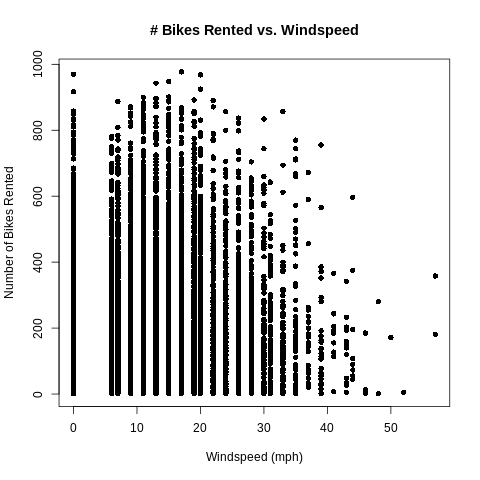

In [42]:
%%R
##In R
y3 <- bikes$count # number of bikes rented
x3 <- bikes$wind # windspeed
modelWind <- lm(y3 ~ x3)

## Construct a scatterplot of these data
plot(x3, y3, ylab = "Number of Bikes Rented", xlab = "Windspeed (mph)", main = "# Bikes Rented vs. Windspeed", pch = 16)

## Calculate the correlation coefficent
cor(x3, y3)

These variables have a very weak, positive relationship. The correlation coefficient in this case is only approximately 0.1014.

In [43]:
##part b
##In Python
##Calculate least squares estimates for beta1 and beta0
beta1_hatTemp = np.corrcoef(x1,y1)[0,1] * np.std(y1) / np.std(x1)
beta0_hatTemp = np.mean(y1) - beta1_hatTemp * np.mean(x1)
print("For count and Temp, beta1 is", beta1_hatTemp, " and beta0 is", beta0_hatTemp)
mu_hatTemp = beta0_hatTemp + beta1_hatTemp * x1

beta1_hatHum = np.corrcoef(x2,y2)[0,1] * np.std(y2) / np.std(x2)
beta0_hatHum = np.mean(y2) - beta1_hatHum * np.mean(x2)
print("For count and Humidity, beta1 is", beta1_hatHum, " and beta0 is", beta0_hatHum)
mu_hatHum = beta0_hatHum + beta1_hatHum * x2

beta1_hatWind = np.corrcoef(x3,y3)[0,1] * np.std(y3) / np.std(x3)
beta0_hatWind = np.mean(y3) - beta1_hatWind * np.mean(x3)
print("For count and windspeed, beta1 is", beta1_hatWind, " and beta0 is", beta0_hatWind)
mu_hatWind = beta0_hatWind + beta1_hatWind * x3

For count and Temp, beta1 is 5.094744711903573  and beta0 is -156.98561782130798
For count and Humidity, beta1 is -2.9872685785344104  and beta0 is 376.4456083303618
For count and windspeed, beta1 is 2.2490579173365712  and beta0 is 162.78755033543703


The approximate lines of best fit for:

a) count vs. temp: $ y = 5.095x - 156.986$

b) count vs. humidity: $y = 376.446 - 2.987x$

c) count vs. windspeed: $y = 2.249x +162.78755$

In [44]:
%%R
##In R
##Calculate least squares estimates for beta1 and beta0
beta1_hatTemp <- cor(x1,y1) * sd(y1) / sd(x1)
beta0_hatTemp <- mean(y1) - beta1_hatTemp * mean(x1)
mu_hatTemp <- beta0_hatTemp + beta1_hatTemp * x1

beta1_hatHum <- cor(x2,y2) * sd(y2) / sd(x2)
beta0_hatHum <- mean(y2) - beta1_hatHum * mean(x2)
mu_hatHum <- beta0_hatHum + beta1_hatHum * x2

beta1_hatWind <- cor(x3,y3) * sd(y3) / sd(x3)
beta0_hatWind <- mean(y3) - beta1_hatWind * mean(x3)
mu_hatWind <- beta0_hatWind + beta1_hatWind * x3


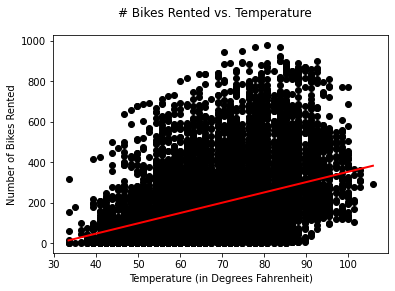

In [45]:
##part c
##In Python
##Scatterplots with lines of best fit on them
fig = plt.figure()
plt.scatter(x1, y1, c = "black")
fig.suptitle("# Bikes Rented vs. Temperature")
plt.ylabel("Number of Bikes Rented")
plt.xlabel("Temperature (in Degrees Fahrenheit)")
x1_pred = np.linspace(x1.min(), x1.max(), 50)
x1_pred_int = sm.tools.tools.add_constant(x1_pred)
y1_pred = modelTemp.predict(x1_pred_int)
fitted_line1, = plt.plot(x1_pred, y1_pred, '-', color = "red", linewidth = 2, label = "Fitted Values")


In [46]:
%%R
##In R
plot(x1, y1, ylab = "Number of Bikes Rented", xlab = "Temperature (in Degrees Fahrenheit)", main = "# Bikes Rented vs. Temperature", pch = 16)
abline(modelTemp, col = "red", lwd = 2)

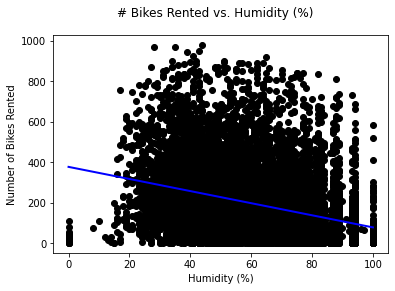

In [47]:
##In Python
fig = plt.figure()
plt.scatter(x2, y2, c = "black")
fig.suptitle("# Bikes Rented vs. Humidity (%)")
plt.ylabel("Number of Bikes Rented")
plt.xlabel("Humidity (%)")
x2_pred = np.linspace(x2.min(), x2.max(), 50)
x2_pred_int = sm.tools.tools.add_constant(x2_pred)
y2_pred = modelHum.predict(x2_pred_int)
fitted_line1, = plt.plot(x2_pred, y2_pred, '-', color = "blue", linewidth = 2, label = "Fitted Values")

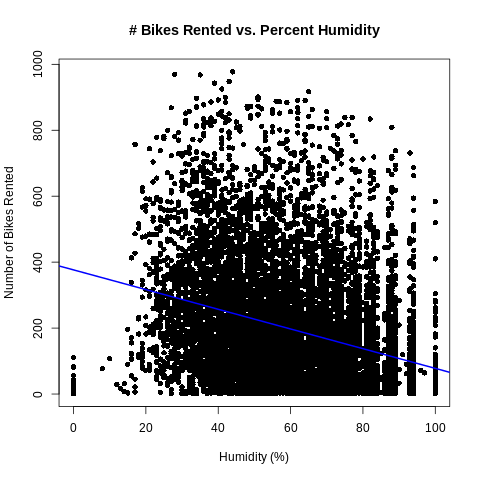

In [48]:
%%R
##In R
plot(x2, y2, ylab = "Number of Bikes Rented", xlab = "Humidity (%)", main = "# Bikes Rented vs. Percent Humidity", pch = 16)
abline(modelHum, col = "blue", lwd = 2)

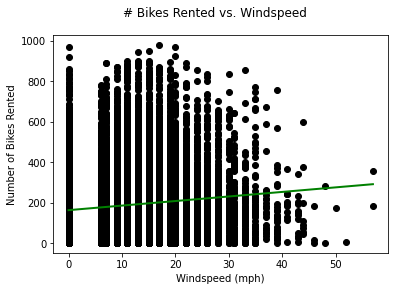

In [49]:
##In Python
fig = plt.figure()
plt.scatter(x3, y3, c = "black")
fig.suptitle("# Bikes Rented vs. Windspeed")
plt.ylabel("Number of Bikes Rented")
plt.xlabel("Windspeed (mph)")
x3_pred = np.linspace(x3.min(), x3.max(), 50)
x3_pred_int = sm.tools.tools.add_constant(x3_pred)
y3_pred = modelWind.predict(x3_pred_int)
fitted_line3, = plt.plot(x3_pred, y3_pred, '-', color = "green", linewidth = 2, label = "Fitted Values")

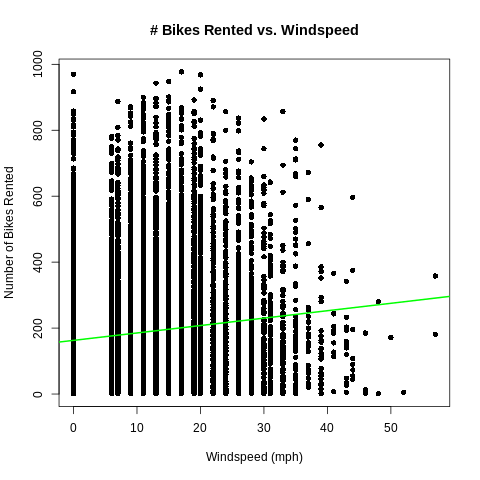

In [50]:
%%R
##In R
plot(x3, y3, ylab = "Number of Bikes Rented", xlab = "Windspeed (mph)", main = "# Bikes Rented vs. Windspeed", pch = 16)
abline(modelWind, col = "green", lwd = 2)

Part d)

Based on the findings thus far, the relationships ranked from most weakly associated to most strongly associated are:

1. Windspeed

2. Humidity

3. Temperature



In [51]:
##part e
##In Python
##Making interpolations
## # bikes rented when 70*F
#i)
beta1_hatTemp * 70 + beta0_hatTemp

199.64651201194215

In [52]:
##ii)
## #bikes rented when 10mph wind
beta1_hatWind * 10 + beta0_hatWind

185.27812950880275

In [53]:
##iii)
## #bikes rented when 40% humidity
beta1_hatHum * 40 + beta0_hatHum

256.95486518898537

In [54]:
%%R
##In R
##i)
beta1_hatTemp * 70 + beta0_hatTemp

[1] 199.6465


In [55]:
%%R
##ii)
beta1_hatWind * 10 + beta0_hatWind

[1] 185.2781


In [56]:
%%R
##iii)
beta1_hatHum * 40 + beta0_hatHum

[1] 256.9549


Part f)

When predicting outside of the range of the data given, one assumes far too much. Our model only knows what happens within the range of the data. Any number of things could happen to the relationship outside of that range. For example, while the data may look linear within the range we have, it could just be a steep side of a polynomial curve, and outside of the range of data given, the relationship curve veers sharply off the line of best fit.

Text(0.5, 0, 'Season (1 = spring, 2 = summer, 3 = fall, 4 = winter)')

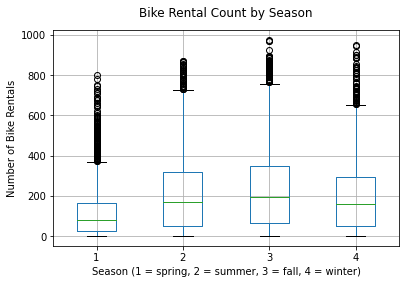

In [57]:
##part g
##In Python
bikes.boxplot(column = 'count', by = 'season')
plt.title("")
plt.suptitle("Bike Rental Count by Season")
plt.ylabel("Number of Bike Rentals")
plt.xlabel("Season (1 = spring, 2 = summer, 3 = fall, 4 = winter)")

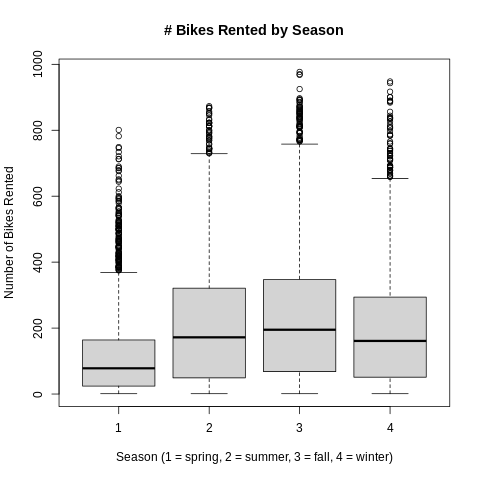

In [58]:
%%R
##In R
boxplot(count ~ season, data = bikes, main = "# Bikes Rented by Season", 
        xlab = "Season (1 = spring, 2 = summer, 3 = fall, 4 = winter)", ylab = "Number of Bikes Rented")

Text(0.5, 0, 'Weather (1 = nice, 2 = cloudy, 3 = rainy, 4 = stormy)')

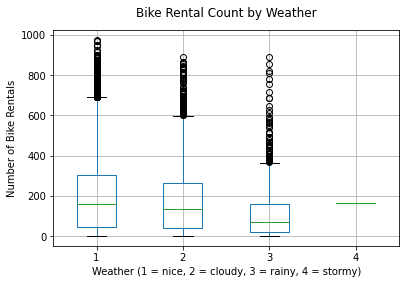

In [59]:
##In Python
##Boxplot of weather data
bikes.boxplot(column = 'count', by = 'weather')
plt.title("")
plt.suptitle("Bike Rental Count by Weather")
plt.ylabel("Number of Bike Rentals")
plt.xlabel("Weather (1 = nice, 2 = cloudy, 3 = rainy, 4 = stormy)")

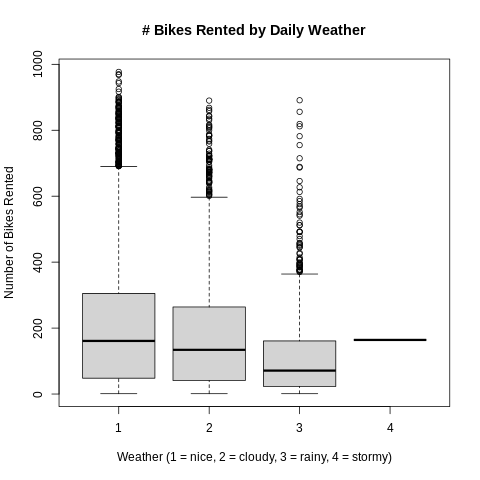

In [60]:
%%R
##In R
boxplot(count~weather, data = bikes, main = "# Bikes Rented by Daily Weather", 
        xlab = "Weather (1 = nice, 2 = cloudy, 3 = rainy, 4 = stormy)", ylab = "Number of Bikes Rented")

The relationship is slightly unclear in both situations as we see do not see a strictly increasing or decreasing relationship via the mean lines in the boxes. The mean lines might even be connected by a quadratic or similar higher power function as their relationship is kind of curved.

In [62]:
##part h
##In Python
count = bikes['count']
season = bikes['season']
weather = bikes['weather']
modelSeasons = sm.OLS(count, sm.tools.tools.add_constant(season), ).fit()
modelSeasons.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     298.7
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           4.76e-66
Time:                        21:29:09   Log-Likelihood:                -71898.
No. Observations:               10886   AIC:                         1.438e+05
Df Residuals:                   10884   BIC:                         1.438e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.0872      4.211     29.705      0.000     116.833     133.342
season        26.5246      1.535     17.283      0.000      23.516      29.533
==============================================================================
Omnibus:                     2041.415   Durbin-Watson:                   0.325
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3536.912
Skew:                           1.222   Prob(JB):                         0.00
Kurtosis:                       4.349   Cond. No.                         7.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
modelWeather = sm.OLS(count, sm.tools.tools.add_constant(weather), ).fit()
modelWeather.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     183.2
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           2.11e-41
Time:                        21:29:23   Log-Likelihood:                -71955.
No. Observations:               10886   AIC:                         1.439e+05
Df Residuals:                   10884   BIC:                         1.439e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.7273      4.221     57.748      0.000     235.454     252.000
weather      -36.7683      2.717    -13.535      0.000     -42.093     -31.443
==============================================================================
Omnibus:                     2024.230   Durbin-Watson:                   0.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3476.744
Skew:                           1.220   Prob(JB):                         0.00
Kurtosis:                       4.309   Cond. No.                         5.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
%%R
##In R
season <- bikes$season
weather <- bikes$weather
count <- bikes$count
modelSeasons <- lm(count ~ season)
summary(modelSeasons)


Call:
lm(formula = count ~ season)

Residuals:
    Min      1Q  Median      3Q     Max 
-230.19 -138.61  -44.90   88.86  772.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  125.087      4.211   29.70   <2e-16 ***
season        26.525      1.535   17.28   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 178.7 on 10884 degrees of freedom
Multiple R-squared:  0.02671,	Adjusted R-squared:  0.02662 
F-statistic: 298.7 on 1 and 10884 DF,  p-value: < 2.2e-16



In [64]:
%%R
modelWeather <- lm(count ~ weather)
summary(modelWeather)


Call:
lm(formula = count ~ weather)

Residuals:
    Min      1Q  Median      3Q     Max 
-205.96 -139.96  -44.96   91.04  770.04 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  243.727      4.221   57.75   <2e-16 ***
weather      -36.768      2.717  -13.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 179.6 on 10884 degrees of freedom
Multiple R-squared:  0.01655,	Adjusted R-squared:  0.01646 
F-statistic: 183.2 on 1 and 10884 DF,  p-value: < 2.2e-16



Interpretation for count vs. season: As the season increases by 1, the number of bike rentals increases by 26 OR As the season changes from spring to summer to fall to winter, the count of bike rentals increases by 26 with each change

Interpretaton for count vs. weather: As the weather increases by 1, the number of bike rentals decreases by 36 OR As the weather changes from nice to cloudy to rainy to stormy, the number of bike rentals decreases by 36.

These interpretations don't seem practical. Weather and season cannot increase by unit increments.

Part i)
Linear models are not appropriate as the numbers assigned to values for season and weather represent categorical variables. Logistic regression would be a better option: it is designed to deal with categorical variables. Also, numerically the model is not well suited for the data as the R^2 values are 0.026 and 0.016 for season and weather, respectively.